<a href="https://colab.research.google.com/github/bradshawjoshua/sales-predictions/blob/main/sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preparation for Sales Predictions Part 2

In [100]:
import pandas as pd
filename = '/content/drive/MyDrive/Coding Dojo/Colab Notebooks/Stack 1/01 Week 1: Python/sales_predictions.csv'
df = pd.read_csv(filename)
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


##Step 1

> 8523 observations, 12 features

In [101]:
df.shape

(8523, 12)

>Discover datatypes in df

##Step 2


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Step 3


>Checking for and dropping duplicates

In [103]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [86]:
df.duplicated().sum()

0

##Step 4

>'Item_Weight' (17%) and 'Outlet_Size' (28%) both have missing values.

In [104]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

> Addressing missing values for the following features:
      Item_Weight, Outlet_Size

In [105]:
item_weight_missing = df['Item_Weight'].isna().sum()
total_rows = df.shape[0]

percent_missing1 = item_weight_missing / total_rows
print(f'{percent_missing1:0.2} of the data in the Item_Weight column is missing')

0.17 of the data in the Item_Weight column is missing


In [106]:
#Fix Outlet_Size missing values
#Highlight patterns to the missing data to give a machine learning model clues

outlet_size_missing = df['Outlet_Size'].isna().sum()
total_rows = df.shape[0]

percent_missing2 = outlet_size_missing / total_rows
print(f'{percent_missing2:.2f} of the data in the Outlet_Size column is missing')

0.28 of the data in the Outlet_Size column is missing


In [107]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


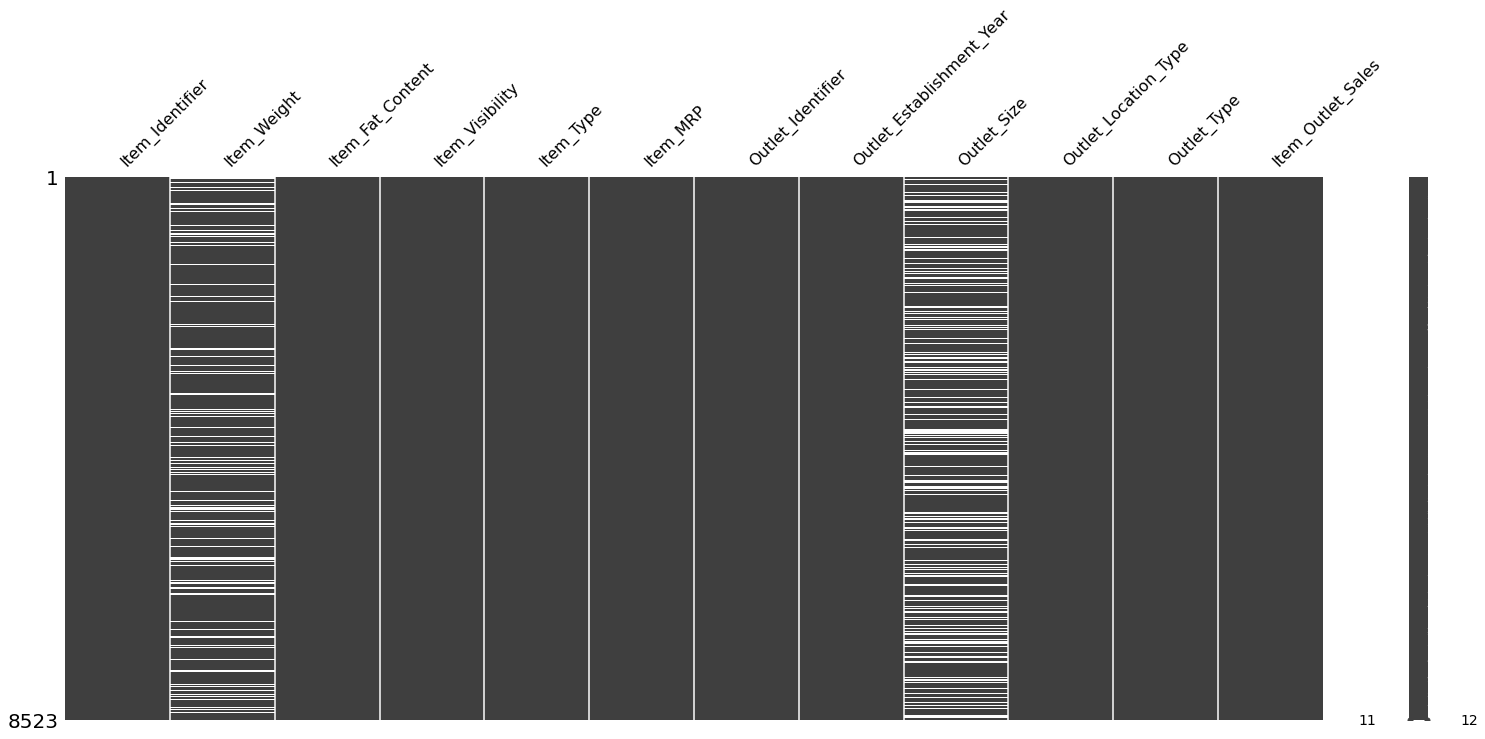

In [108]:
import missingno
missingno.matrix(df)

##Step 5

Justification for Outlet_Size: 

>Filling missing data with a new category called 'Missing'. Loose correlation from Outlet_Size to Item_Outlet_Sales, therefore; I decided to not use imputation via mode. Identifying exceptions to highlight patterns of missing data for analysis.

In [109]:
df['Outlet_Size'].fillna('Missing', inplace=True)

Justification for Item_Weight:
>Respective item identifier reveals equal item weight across its distribution of observations. We can correlate missing values by item identifier by using the grouby function to replace respective null values. 

>Item identifier allows us to make a good judgement call on its item weight based on existing values with the same item identifier.

>Using median, mean, or mode by its item identifier will not have an affect on output, due to equal value for a respective observation

In [110]:
df.groupby('Item_Identifier')['Item_Weight'].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Identifier,,,,,,,,
DRA12,6.0,11.600,0.000000e+00,11.600,11.600,11.600,11.600,11.600
DRA24,5.0,19.350,0.000000e+00,19.350,19.350,19.350,19.350,19.350
DRA59,6.0,8.270,1.945901e-15,8.270,8.270,8.270,8.270,8.270
DRB01,2.0,7.390,0.000000e+00,7.390,7.390,7.390,7.390,7.390
DRB13,5.0,6.115,0.000000e+00,6.115,6.115,6.115,6.115,6.115
...,...,...,...,...,...,...,...,...
NCZ30,6.0,6.590,9.729507e-16,6.590,6.590,6.590,6.590,6.590
NCZ41,5.0,19.850,0.000000e+00,19.850,19.850,19.850,19.850,19.850
NCZ42,5.0,10.500,0.000000e+00,10.500,10.500,10.500,10.500,10.500


In [111]:
df['Item_Weight'] = (df.set_index('Item_Identifier').Item_Weight
                  .fillna(df.groupby('Item_Identifier').Item_Weight.median()).values)

##Step 6

>Checking for missing values again

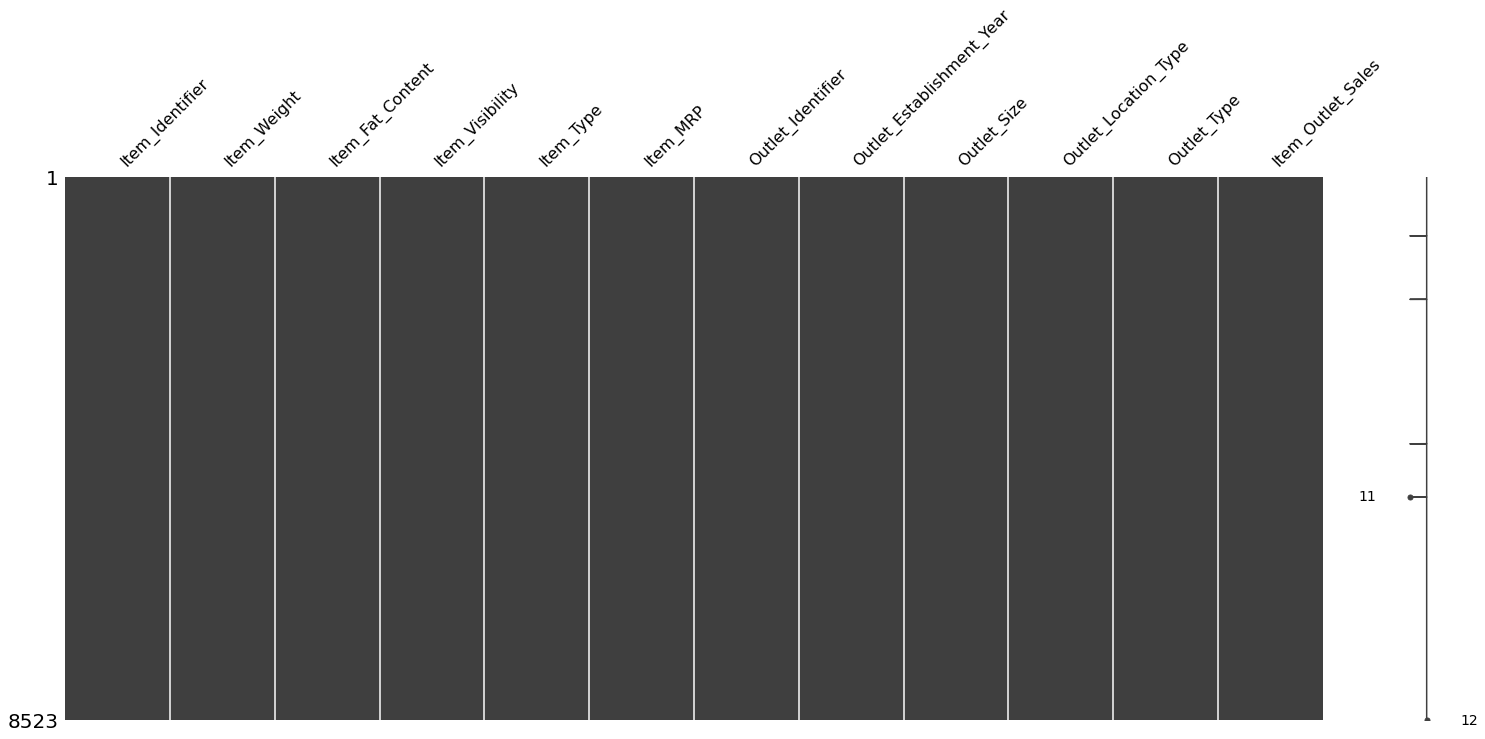

In [114]:
#Confirm that there are no missing values after addressing them.
missingno.matrix(df)

In [112]:
# Export DataFrame to Excel File
df.to_excel(excel_writer='sales_prediction.xlsx',index=False)

##Step 7

>Check for inconsistent categorical observations

In [122]:
#Notice 'reg' and 'LF', these two categorical items can be replaced with Regular and Low Fat respectively
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')

##Step 8

>Summary statistics of each numerical feature (min, max, mean)

In [123]:
df.sort_values(by=['Item_Fat_Content'])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
5083,NCN06,8.390,Low Fat,0.201688,Household,162.8868,OUT010,1998,Missing,Tier 3,Grocery Store,327.5736
5082,FDC38,15.700,Low Fat,0.122392,Canned,133.1942,OUT013,1987,High,Tier 3,Supermarket Type1,2782.3782
5079,NCY17,18.200,Low Fat,0.163350,Health and Hygiene,45.1086,OUT049,1999,Medium,Tier 1,Supermarket Type1,669.1290
5078,FDD03,13.300,Low Fat,0.079791,Dairy,232.7300,OUT035,2004,Small,Tier 2,Supermarket Type1,2796.3600
...,...,...,...,...,...,...,...,...,...,...,...,...
1936,FDD59,10.500,Regular,0.066555,Starchy Foods,80.8960,OUT017,2007,Missing,Tier 2,Supermarket Type1,958.7520
5526,FDS59,14.800,Regular,0.073469,Breads,110.8570,OUT010,1998,Missing,Tier 3,Grocery Store,329.5710
1933,FDS25,6.885,Regular,0.140292,Canned,108.5228,OUT045,2002,Missing,Tier 2,Supermarket Type1,1989.4104
1944,FDC33,8.960,Regular,0.069078,Fruits and Vegetables,197.7768,OUT045,2002,Missing,Tier 2,Supermarket Type1,3153.2288


In [113]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875420,0.066132,140.992782,1997.831867,2181.288914
std,4.646098,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.650000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800
